<a href="https://colab.research.google.com/github/nguyenphucloc22/test/blob/main/Intelligent_Size_Matching_Recommender_System_Fuzzy_Logic_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install scikit-fuzzy 


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 13.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=470914bcca30b3bd6d1d478269bcb3445330db67c1e78717179f019324baa541
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy


8.026834811476013


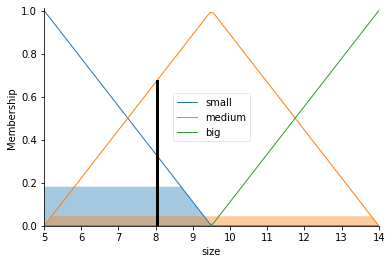

In [8]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from skfuzzy import control as ctrl
%matplotlib inline
#INPUT
x_height=np.linspace(80,150,num=150)
x_weight=np.linspace(18,40,num=100)
x_chest=np.linspace(49.2,85.2,num=100)
x_waist=np.linspace(45,66,num=100)
x_size=np.linspace(5,14,num=100)
height=ctrl.Antecedent(x_height,"height")
weight=ctrl.Antecedent(x_weight,"weight")
chest=ctrl.Antecedent(x_chest,"chest")
waist=ctrl.Antecedent(x_waist,"waist")
size=ctrl.Consequent(x_size,"size")
names_height=['low','medium','high']
names_weight=['low','medium','high']
names_chest=['low','medium','high']
names_waist=["low",'medium','high']
names_size=['small','medium','big']
size["small"]=fuzz.trimf(size.universe,[5,5,7])
size["medium"]=fuzz.trimf(size.universe,[5,7,14])
size["big"]=fuzz.trimf(size.universe,[7,14,14])
height.automf(names=names_height)
weight.automf(names=names_weight)
chest.automf(names=names_chest)
waist.automf(names=names_waist)
size.automf(names=names_size)
rule1 = ctrl.Rule(height['high'] & waist['high']& chest['high']& weight['high'], size['big'])
rule2 = ctrl.Rule(height['high'] & waist['medium']& chest['medium']& weight['medium'], size['medium'])
rule3 = ctrl.Rule(height['high'] & waist['low']& chest['low']& weight['low'], size['small'])

rule4 = ctrl.Rule(height['medium'] & waist['high']& chest['high']& weight['high'], size['medium'])
rule5 = ctrl.Rule(height['medium'] & waist['medium']& chest['medium']& weight['medium'], size['medium'])
rule6 = ctrl.Rule(height['medium'] & waist['low']& chest['low']& weight['low'], size['small'])

rule7 = ctrl.Rule(height['low'] & waist['high']& chest['high']& weight['high'], size['big'])
rule8 = ctrl.Rule(height['low'] & waist['medium']& chest['medium']& weight['medium'], size['medium'])
rule9 = ctrl.Rule(height['low'] & waist['low']& chest['low']& weight['low'], size['small'])

rule10 = ctrl.Rule(height['high'] & waist['high']& chest['high']& weight['low'], size['medium'])
rule11 = ctrl.Rule(height['high'] & waist['high']& chest['high']& weight['medium'], size['big'])
rule12= ctrl.Rule(height['high'] & waist['high']& chest['medium']& weight['high'], size['big'])
rule13= ctrl.Rule(height['high'] & waist['high']& chest['medium']& weight['low'], size['big'])
rule14= ctrl.Rule(height['high'] & waist['high']& chest['low']& weight['high'], size['big'])
rule15= ctrl.Rule(height['high'] & waist['high']& chest['low']& weight['low'], size['medium'])

rule16= ctrl.Rule(height['low'] & waist['low']& chest['high']& weight['high'], size['medium'])
rule17= ctrl.Rule(height['low'] & waist['low']& chest['medium']& weight['medium'], size['medium'])
rule18= ctrl.Rule(height['low'] & waist['low']& chest['medium']& weight['high'], size['medium'])

rule19= ctrl.Rule(height['medium'] & waist['medium']& chest['high']& weight['high'], size['medium'])
rule20= ctrl.Rule(height['medium'] & waist['medium']& chest['low']& weight['low'], size['small'])

system_ctrl=ctrl.ControlSystem(rules=[rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20])
system=ctrl.ControlSystemSimulation(system_ctrl)
system.input['height'] = 80
system.input['weight'] = 27
system.input['waist'] = 35
system.input['chest'] = 50
system.compute()
print(system.output['size'])
size.view(sim=system)

